In [2]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
train_data = sio.loadmat(r"C:\Users\Souvik Bhattacharyya\Desktop\Mentorship\Data\MNIST\mnist_training_data.mat")
train_label = sio.loadmat(r"C:\Users\Souvik Bhattacharyya\Desktop\Mentorship\Data\MNIST\mnist_training_label.mat")
test_data = sio.loadmat(r"C:\Users\Souvik Bhattacharyya\Desktop\Mentorship\Data\MNIST\mnist_test_data.mat")
test_label = sio.loadmat(r"C:\Users\Souvik Bhattacharyya\Desktop\Mentorship\Data\MNIST\mnist_test_label.mat")

train_data = pd.DataFrame(train_data["training_data"])
train_label = pd.DataFrame(train_label["training_label"])
test_data = pd.DataFrame(test_data["test_data"])
test_label = pd.DataFrame(test_label["test_label"])

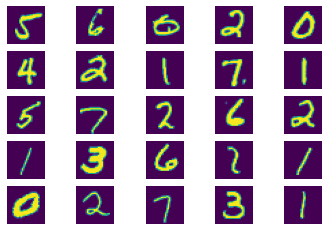

In [33]:
index = np.random.permutation(train_data.shape[0])
k = 1
for i in range(25):
    plt.subplot(5, 5, k)
    plt.imshow(np.array(train_data.iloc[index[i], :]).reshape(28, 28))
    plt.axis("off")
    k += 1

#### Now we apply PCA technique to reduce the dimension of the feature space retaining 90% variability.

In [16]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 784)
pca.fit(x_train)

for i in range(x_train.shape[1]):
    if np.cumsum(pca.explained_variance_ratio_)[i] > .9:   # explains 90% of the total variance
        new_dim = i
        break
        
print(new_dim)                                             # gives number of principal componants to use

233


In [17]:
# Applying PCA with dimension 233 and scaling the features

pca = PCA(n_components = new_dim).fit(x_train)
z_train = scale(pca.transform(x_train))
z_test = scale(pca.transform(x_test))

# Decision Trees:

### At first we will apply decision tree algorithm on the original dataset and then we will apply the same on the dataset with reduced dimension after applying PCA.

In [3]:
# Decison Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)

### Applying Decison Tree to the original dataset: 

In [10]:
from sklearn.metrics import accuracy_score
y_pred_tree = clf.predict(test_data)
print(clf.tree_.max_depth)
print(f"Accuracy: {accuracy_score(np.ravel(test_label), y_pred_tree) * 100} % ")

42
Accuracy: 87.8 % 


### Applying Decison Tree after applying PCA: 

In [18]:
# Applying PCA
clf = tree.DecisionTreeClassifier()
clf = clf.fit(z_train, train_label)

from sklearn.metrics import accuracy_score
y_pred_tree = clf.predict(z_test)
print(clf.tree_.max_depth)
print(f"Accuracy after applying pca: {accuracy_score(np.ravel(test_label), y_pred_tree) * 100} % ")

53
Accuracy after applying pca: 80.13 % 


#### After applying PCA on our dataset and then applying decision trees actully reduced the accuracy of the model on the test dataset!

#### We are applying decision tree with cost complexity pruning considering alpha values ranging from 0 to 0.0005 with an interval of 0.00005.

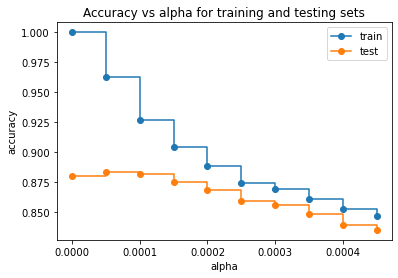

In [15]:
# Cost Coplexity Pruning
from sklearn import tree
import matplotlib.pyplot as plt

ccp_alphas =np.arange(0, 0.0005, 0.00005)
train_scores = []
test_scores = []

for i in np.arange(0, 0.0005, 0.00005):
    clf_pruning = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf_pruning.fit(train_data, train_label)
    train_scores.append(clf_pruning.score(train_data, train_label)) 
    test_scores.append(clf_pruning.score(test_data, test_label)) 
    
# Plotting accuracies vs alpha for training and testing sets    
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [32]:
max_test_score = max(test_scores)
max_at = test_scores.index(max_test_score) * 0.00005
print(f"Max test score of {max(test_scores) * 100}% is obtained when alpha = {format(max_at, '.5f')}")
print(f"Traing score at alpha = {format(max_at, '.5f')} is {train_scores[test_scores.index(max_test_score)] * 100}%")

Max test score of 88.31% is obtained when alpha = 0.00005
Traing score at alpha = 0.00005 is 96.238%


#### As we can see from above, taking alpha = 0.00005 leads to the best training and testing accuracy of 96.238% and 88.31% respectively 

### Random Forest

#### We applied random forest on the orginal dataset keeping the bagging parameter(number of features to consider when looking for the best split) as default, i.e. $\sqrt p$ where we have $p$ features (in our case, $p = 784$).

In [4]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(random_state=0)
clf_random.fit(train_data, np.ravel(train_label))
y_pred_random = clf_random.predict(test_data)

print(f"Training accuracy: {clf_random.score(train_data, train_label) * 100} %")
print(f"Test accuracy: {clf_random.score(test_data, test_label) * 100} %")

Training accuracy: 100.0 %
Test accuracy: 96.87 %


#### As we can see from the above output, Random Forest works quite well with the test data and achieved 96.87% accurate result.